## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as datetime

## 2. Data Loading and Exploration

In [2]:
#load dataset
df = pd.read_csv('Aviation_Data.csv')


<ipython-input-2-3ba06f978a03>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


In [3]:
#understanding dataset
print('Dataset Shape:\n', df.shape)


Dataset Shape:
 (90348, 31)


In [4]:
#dataset columns 
print('Dataset Columns: \n', df.columns.tolist())

Dataset Columns: 
 ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [5]:
print('Dataset Basic info: \n ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
print('Database Data Type: \n')
df.dtypes

Database Data Type: 



Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

Our dataset has 90348 rows and 31 columns.  
Some columns have missing values.  

## 3. Data Cleaning

We are going to clean the columns we need for this analysis

In [7]:
# Critical columns for our safety analysis
essential_columns = [
    'Event.Id',           # Unique identifier
    'Event.Date',         # For time trends
    'Make',               # Aircraft manufacturer
    'Model',              # Aircraft model
    'Aircraft.Category',  # Type of aircraft
    'Injury.Severity',    # Accident severity
    'Total.Fatal.Injuries',     # Safety metric
    'Total.Serious.Injuries',   # Safety metric  
    'Total.Minor.Injuries',     # Safety metric
    'Total.Uninjured',          # Safety metric
    'Aircraft.damage',    # Damage level
    'Broad.phase.of.flight',    # When accidents happen
    'Weather.Condition',  # Environmental factors
    'Purpose.of.flight',  # Type of operation
    'Number.of.Engines',  # Technical specs
    'Engine.Type'         # Technical specs
]

In [8]:
print('We will be analysing', len(essential_columns), 'out of', len(df.columns), 'columns')

We will be analysing 16 out of 31 columns


In [9]:
#create a new dataframe with the necessary columns only
df_clean = df[essential_columns].copy()
df_clean.head()

,Event.Id,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight,Weather.Condition,Purpose.of.flight,Number.of.Engines,Engine.Type
0,20001218X45444,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Cruise,UNK,Personal,1.0,Reciprocating
1,20001218X45447,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0,0.0,Destroyed,Unknown,UNK,Personal,1.0,Reciprocating
2,20061025X01555,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,NaN,NaN,NaN,Destroyed,Cruise,IMC,Personal,1.0,Reciprocating
3,20001218X45448,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Cruise,IMC,Personal,1.0,Reciprocating
4,20041105X01764,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,NaN,0.0,Destroyed,Approach,VMC,Personal,NaN,NaN


In [10]:
#finding column with missing values
print('Missing values per column')

missing = df_clean.isnull().sum()
missing


Missing values per column


Event.Id                   1459
Event.Date                 1459
Make                       1522
Model                      1551
Aircraft.Category         58061
Injury.Severity            2459
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Aircraft.damage            4653
Broad.phase.of.flight     28624
Weather.Condition          5951
Purpose.of.flight          7651
Number.of.Engines          7543
Engine.Type                8536
dtype: int64

In [11]:
#percentage of missing values
missing_values_percentage = (missing / len(df_clean)* 100).round(2)
print('missing value percentage \n', missing_values_percentage.sort_values(ascending=False))


missing value percentage 
 Aircraft.Category         64.26
Broad.phase.of.flight     31.68
Total.Serious.Injuries    15.46
Total.Minor.Injuries      14.82
Total.Fatal.Injuries      14.23
Engine.Type                9.45
Purpose.of.flight          8.47
Number.of.Engines          8.35
Total.Uninjured            8.16
Weather.Condition          6.59
Aircraft.damage            5.15
Injury.Severity            2.72
Model                      1.72
Make                       1.68
Event.Id                   1.61
Event.Date                 1.61
dtype: float64


### Drop rows with missing value for unique identifiers

In [12]:
df_clean.dropna(subset= ['Event.Id'], inplace=True)
#check if rows with missing values are dropped
print('Event ID missing values: ' , df_clean['Event.Id'].isna().sum())

Event ID missing values:  0


We removed the missing values in the Event.Id column since they are unique and we need them to identify the accidents

### Date column

In [13]:
#Check for missing values
print('Event Date missing values:', df_clean['Event.Date'].isnull().sum())

Event Date missing values: 0


In [14]:
#convert to datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'],format= '%Y-%m-%d', errors = 'coerce')
df_clean['Event.Date'].dtype

dtype('<M8[ns]')

In [15]:
#Create a new column with Event Year
df_clean['Event.Year'] = df_clean['Event.Date'].dt.year
df_clean.head()

,Event.Id,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight,Weather.Condition,Purpose.of.flight,Number.of.Engines,Engine.Type,Event.Year
0,20001218X45444,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Cruise,UNK,Personal,1.0,Reciprocating,1948
1,20001218X45447,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0,0.0,Destroyed,Unknown,UNK,Personal,1.0,Reciprocating,1962
2,20061025X01555,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,NaN,NaN,NaN,Destroyed,Cruise,IMC,Personal,1.0,Reciprocating,1974
3,20001218X45448,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,Cruise,IMC,Personal,1.0,Reciprocating,1977
4,20041105X01764,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,NaN,0.0,Destroyed,Approach,VMC,Personal,NaN,NaN,1979


### Aircraft information

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Make                    88826 non-null  object        
 3   Model                   88797 non-null  object        
 4   Aircraft.Category       32287 non-null  object        
 5   Injury.Severity         87889 non-null  object        
 6   Total.Fatal.Injuries    77488 non-null  float64       
 7   Total.Serious.Injuries  76379 non-null  float64       
 8   Total.Minor.Injuries    76956 non-null  float64       
 9   Total.Uninjured         82977 non-null  float64       
 10  Aircraft.damage         85695 non-null  object        
 11  Broad.phase.of.flight   61724 non-null  object        
 12  Weather.Condition       84397 non-null  object

In [17]:
print('Aircraft Make missing values:', df_clean['Make'].isnull().sum())
print('Aircraft Model missing values:', df_clean['Model'].isnull().sum())
print('Aircraft Category missing values:', df_clean['Aircraft.Category'].isnull().sum())


Aircraft Make missing values: 63
Aircraft Model missing values: 92
Aircraft Category missing values: 56602


Replace the missing value with text

In [18]:
df_clean['Make'] = df_clean['Make'].fillna('Unknown Make')

In [19]:
df_clean['Model'] = df_clean['Model'].fillna('Unknown Model')

In [20]:
df_clean['Aircraft.Category'] = df_clean['Aircraft.Category'].fillna('Unknown Category')

### Handle operational factors

In [21]:
operation = ['Broad.phase.of.flight', 'Weather.Condition', 'Purpose.of.flight', 'Aircraft.damage', 'Engine.Type', 'Injury.Severity']

In [22]:
df_clean[operation].isnull().sum()

Broad.phase.of.flight    27165
Weather.Condition         4492
Purpose.of.flight         6192
Aircraft.damage           3194
Engine.Type               7077
Injury.Severity           1000
dtype: int64

In [23]:
#replace missing values with Unknown
for i in operation:
    if df_clean[i].isnull().sum() >0:
        df_clean[i] = df_clean[i].fillna('Unknown')

In [24]:
df_clean[operation].isnull().sum()

Broad.phase.of.flight    0
Weather.Condition        0
Purpose.of.flight        0
Aircraft.damage          0
Engine.Type              0
Injury.Severity          0
dtype: int64

### Handling missing values in numerical columns

In [25]:
injuries = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured' ]

#### remove rows with missing total fatal injuries

In [26]:
df_clean.dropna(subset= ['Total.Fatal.Injuries'], inplace= True)

In [27]:
df_clean[injuries].isnull().sum()

Total.Fatal.Injuries         0
Total.Serious.Injuries    2658
Total.Minor.Injuries      2961
Total.Uninjured           2999
dtype: int64

### Replacing missing values with mean

In [28]:
for col in injuries:
    if df_clean[col].isnull().sum() >0:
        mean_val = round(df_clean[col].mean(), 0)
        df_clean[col] = df_clean[col].fillna(mean_val)

In [29]:
#check for missing values
df_clean[injuries].isnull().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [30]:
mean_val2 = round(df_clean['Number.of.Engines'].mean(), 0)
df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].fillna(mean_val2)

In [31]:
df_clean.isnull().sum()

Event.Id                  0
Event.Date                0
Make                      0
Model                     0
Aircraft.Category         0
Injury.Severity           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Aircraft.damage           0
Broad.phase.of.flight     0
Weather.Condition         0
Purpose.of.flight         0
Number.of.Engines         0
Engine.Type               0
Event.Year                0
dtype: int64

### Categorize and Replace data

In [32]:
#Check for available values
df_clean['Injury.Severity'].value_counts()

Non-Fatal     56686
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       1574
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: Injury.Severity, Length: 110, dtype: int64

In [33]:
#Categorize injury severity into Fatal, Non-Fatal, or Unknown
df_clean['Injury.Level'] = df_clean['Injury.Severity'].astype(str).apply( lambda x: 'Fatal' if 'Fatal' in x or 'Serious' in x else 'Non-Fatal' if 'Non-Fatal' in x or 'Incident' in x or 'Minor' in x else 'unknown' )

In [34]:
df_clean['Injury.Level'].value_counts()

Fatal        74685
Non-Fatal     1792
unknown       1011
Name: Injury.Level, dtype: int64

In [35]:
#Move all unknown values to one category
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].replace(
    ['UNK', 'Unk', 'Unknown'],
    'Unknown'
)

In [36]:
#clean the engine type category
df_clean['Engine.Type'] = df_clean['Engine.Type'].replace({
    'UNK': 'Unknown',
    'NONE': 'Unknown',
    'Unknown ': 'Unknown',
    'None.': 'Unknown',
    'LR': 'Unknown',
    'Uknown': 'Unknown',
    'Ukn': 'Unknown'
})

In [37]:
df_clean['Aircraft.Category'].unique()

array(['Unknown Category', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Unknown', 'Weight-Shift',
       'Powered Parachute', 'Powered-Lift', 'Rocket', 'Blimp', 'WSFT',
       'UNK', 'ULTR'], dtype=object)

In [38]:
df_clean['Aircraft.Category'] = df_clean['Aircraft.Category'].replace({
    'UNK': 'Unknown Category',
    'NONE': 'Unknown',
    'Unknown': 'Unknown Category',
})

In [39]:
#Format the Make column
df_clean['Make'] = df_clean['Make'].str.strip().str.title()

In [40]:
#Create new column to show
df_clean.isnull().sum()

Event.Id                  0
Event.Date                0
Make                      0
Model                     0
Aircraft.Category         0
Injury.Severity           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Aircraft.damage           0
Broad.phase.of.flight     0
Weather.Condition         0
Purpose.of.flight         0
Number.of.Engines         0
Engine.Type               0
Event.Year                0
Injury.Level              0
dtype: int64

## 4. Data Analysis

### Exploratory Analysis

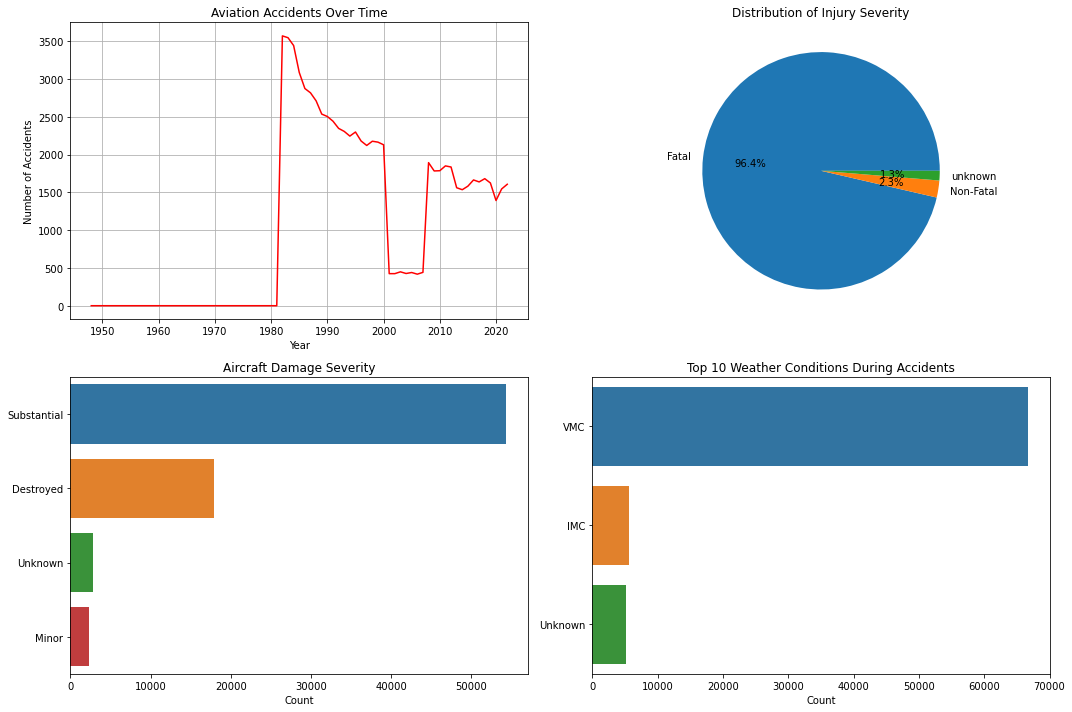

In [41]:
# 1. Overall accident trends over time
plt.figure(figsize=(15, 10))

# Subplot 1: Accidents by year
plt.subplot(2, 2, 1)
yearly_accidents = df_clean.groupby('Event.Year').size()
yearly_accidents.plot(kind='line', title='Aviation Accidents Over Time', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)

# Subplot 2: Injury severity distribution
plt.subplot(2, 2, 2)
injury_counts = df_clean['Injury.Level'].value_counts()
plt.pie(injury_counts.values, labels=injury_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Injury Severity')

# Subplot 3: Aircraft damage
plt.subplot(2, 2, 3)
damage_counts = df_clean['Aircraft.damage'].value_counts()
sns.barplot(x=damage_counts.values, y=damage_counts.index)
plt.title('Aircraft Damage Severity')
plt.xlabel('Count')

# Subplot 4: Weather conditions
plt.subplot(2, 2, 4)
weather_counts = df_clean['Weather.Condition'].value_counts().head(10)
sns.barplot(x=weather_counts.values, y=weather_counts.index)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

###  Safest Aircraft Manufacturers

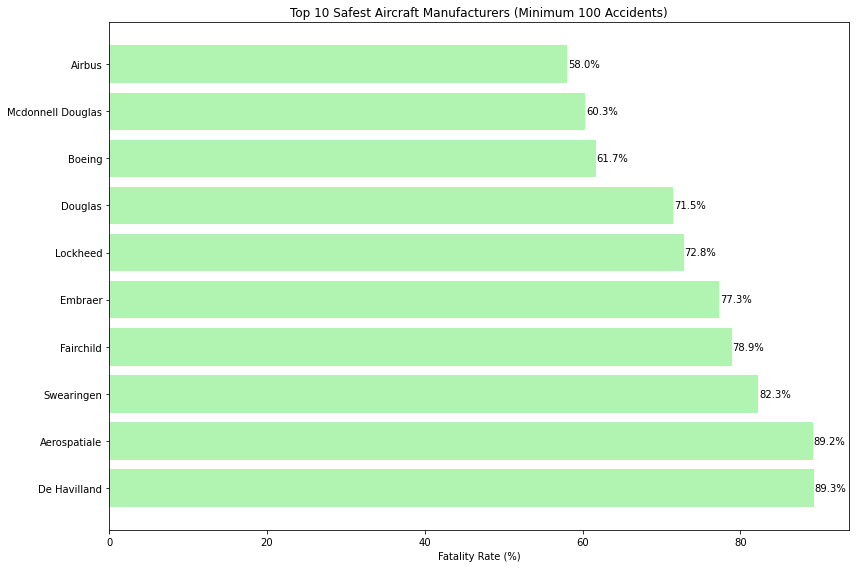

Safety Analysis by Manufacturer:
                Make  Total_Accidents  Fatal_Accidents  Fatality_Rate
0             Airbus              274              159      58.029197
1  Mcdonnell Douglas              464              280      60.344828
2             Boeing             2270             1400      61.674009
3            Douglas              249              178      71.485944
4           Lockheed              103               75      72.815534


In [42]:
# Calculate safety metrics by aircraft manufacturer
manufacturer_safety = df_clean.groupby('Make').agg({
    'Event.Id': 'count',  # Total accidents
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Injury.Level': lambda x: (x == 'Fatal').sum()  # Count fatal accidents
}).rename(columns={'Event.Id': 'Total_Accidents', 'Injury.Level': 'Fatal_Accidents'})

# Calculate fatality rate (fatal accidents per total accidents)
manufacturer_safety['Fatality_Rate'] = (manufacturer_safety['Fatal_Accidents'] / 
                                       manufacturer_safety['Total_Accidents'] * 100)

# Filter for manufacturers with significant number of accidents (at least 100)
significant_manufacturers = manufacturer_safety[manufacturer_safety['Total_Accidents'] >= 100]
safest_manufacturers = significant_manufacturers.nsmallest(10, 'Fatality_Rate')

plt.figure(figsize=(12, 8))
bars = plt.barh(safest_manufacturers.index, safest_manufacturers['Fatality_Rate'], 
                color='lightgreen', alpha=0.7)
plt.xlabel('Fatality Rate (%)')
plt.title('Top 10 Safest Aircraft Manufacturers (Minimum 100 Accidents)')
plt.gca().invert_yaxis()

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

print("Safety Analysis by Manufacturer:")
print(safest_manufacturers[['Total_Accidents', 'Fatal_Accidents', 'Fatality_Rate']].head().reset_index())

### Risk by Flight Phase

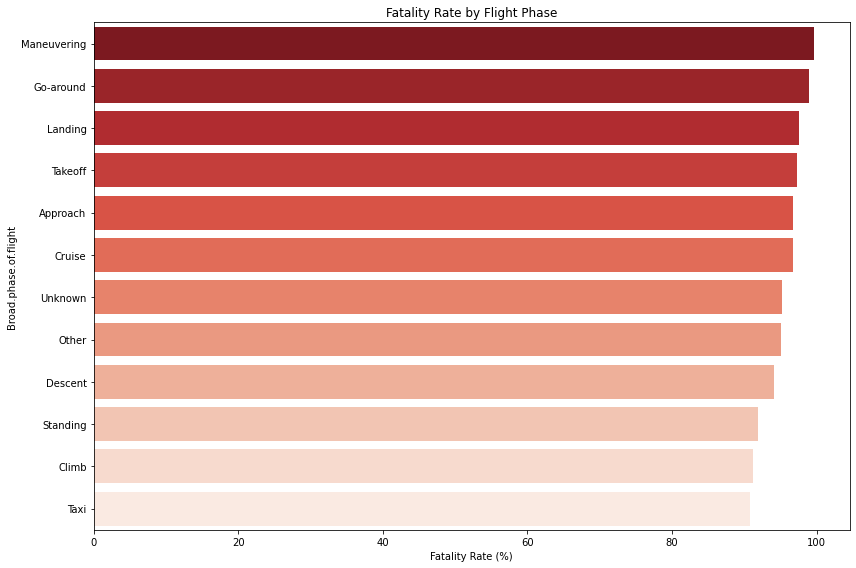

Safest flight phase:
  Broad.phase.of.flight  Total_Accidents  Fatal_Accidents  Fatality_Rate
0                 Other              101               96      95.049505
1               Descent             1589             1495      94.084330
2              Standing              721              663      91.955617
3                 Climb             1760             1606      91.250000
4                  Taxi             1518             1379      90.843215


In [43]:
# Analyze accidents by flight phase
flight_phase_analysis = df_clean.groupby('Broad.phase.of.flight').agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Injury.Level': lambda x: (x == 'Fatal').sum()
}).rename(columns={'Event.Id': 'Total_Accidents', 'Injury.Level': 'Fatal_Accidents'})

flight_phase_analysis['Fatality_Rate'] = (flight_phase_analysis['Fatal_Accidents'] / 
                                         flight_phase_analysis['Total_Accidents'] * 100)

# Sort by fatality rate
flight_phase_analysis = flight_phase_analysis.sort_values('Fatality_Rate', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Fatality_Rate', y=flight_phase_analysis.index, 
            data=flight_phase_analysis, palette='Reds_r')
plt.xlabel('Fatality Rate (%)')
plt.title('Fatality Rate by Flight Phase')
plt.tight_layout()
plt.show()

print("Safest flight phase:")
print(flight_phase_analysis[['Total_Accidents', 'Fatal_Accidents', 'Fatality_Rate']].tail().reset_index())

## Weather Impact on Safety

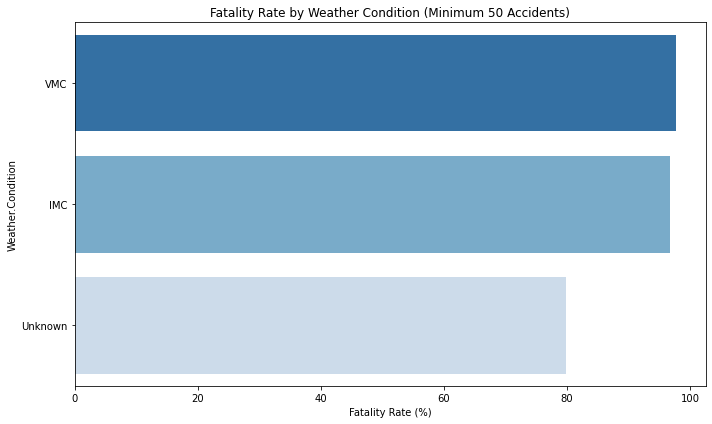

In [44]:
# Analyze weather impact
weather_impact = df_clean.groupby('Weather.Condition').agg({
    'Event.Id': 'count',
    'Injury.Level': lambda x: (x == 'Fatal').sum()
}).rename(columns={'Event.Id': 'Total_Accidents', 'Injury.Level': 'Fatal_Accidents'})

weather_impact['Fatality_Rate'] = (weather_impact['Fatal_Accidents'] / 
                                  weather_impact['Total_Accidents'] * 100)

# Filter for common weather conditions
common_weather = weather_impact[weather_impact['Total_Accidents'] > 50]
common_weather = common_weather.sort_values('Fatality_Rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Fatality_Rate', y=common_weather.index, data=common_weather, palette='Blues_r')
plt.xlabel('Fatality Rate (%)')
plt.title('Fatality Rate by Weather Condition (Minimum 50 Accidents)')
plt.tight_layout()
plt.show()

### Aircraft Category Safety Analysis

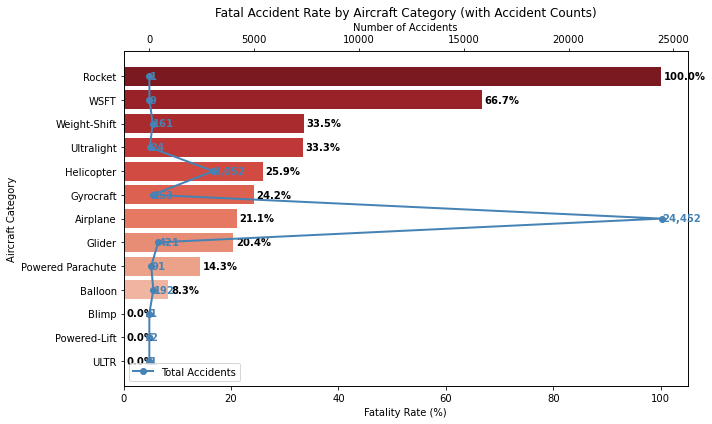

                   Total_Accidents  Fatal_Accidents  Fatality_Rate
Aircraft.Category                                                 
Rocket                           1                1     100.000000
WSFT                             9                6      66.666667
Weight-Shift                   161               54      33.540373
Ultralight                      24                8      33.333333
Helicopter                    3052              790      25.884666
Gyrocraft                      153               37      24.183007
Airplane                     24452             5161      21.106658
Glider                         421               86      20.427553
Powered Parachute               91               13      14.285714
Balloon                        192               16       8.333333
Blimp                            1                0       0.000000
Powered-Lift                     2                0       0.000000
ULTR                             1                0       0.00

In [45]:
# Group by aircraft category
category_summary = df_clean.groupby('Aircraft.Category').agg(
    Total_Accidents=('Event.Id', 'count'),
    Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum()),
    Uninjured=('Total.Uninjured', 'sum')
)

# Calculate fatality and survival rates
category_summary['Fatality_Rate'] = (
    category_summary['Fatal_Accidents'] / category_summary['Total_Accidents'] * 100
)
category_summary['Survival_Rate'] = (
    category_summary['Uninjured'] / category_summary['Total_Accidents'] * 100
)

# Clean and sort
category_summary = (
    category_summary[category_summary.index != 'Unknown Category']
    .sort_values('Fatality_Rate', ascending=False)
)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for fatality rate
sns.barplot(
    x='Fatality_Rate',
    y=category_summary.index,
    data=category_summary,
    palette='Reds_r',
    ax=ax1
)
ax1.set_xlabel('Fatality Rate (%)')
ax1.set_ylabel('Aircraft Category')
ax1.set_title('Fatal Accident Rate by Aircraft Category (with Accident Counts)')

# Create a twin axis for accident counts
ax2 = ax1.twiny()
ax2.plot(
    category_summary['Total_Accidents'],
    category_summary.index,
    'o-', color='steelblue', linewidth=2, markersize=6, label='Total Accidents'
)
ax2.set_xlabel('Number of Accidents')

# Add value labels
for i, (rate, count) in enumerate(zip(category_summary['Fatality_Rate'], category_summary['Total_Accidents'])):
    ax1.text(rate + 0.5, i, f'{rate:.1f}%', va='center', fontweight='bold')
    ax2.text(count + 20, i, f'{count:,}', va='center', fontweight='bold', color='steelblue')

# Legends and layout
ax2.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Summary table
print(category_summary[['Total_Accidents', 'Fatal_Accidents', 'Fatality_Rate']])

In [46]:
# Step 1: Create cleaned dataset with simplified weather categories
tableau_export = df_clean.copy()

# Simplify Weather Condition to Good/Bad/Unknown
tableau_export['Weather_Simple'] = tableau_export['Weather.Condition'].replace({
    'VMC': 'Good Weather',
    'IMC': 'Bad Weather', 
    'Unknown': 'Unknown Weather'
})

# Calculate if the accident was fatal (for fatality rate calculation in Tableau)
tableau_export['Is_Fatal_Accident'] = (tableau_export['Injury.Level'] == 'Fatal').astype(int)

# Calculate if everyone survived (for survival rate calculation in Tableau)
tableau_export['Is_Survival_Accident'] = (tableau_export['Injury.Level'] == 'None').astype(int)

# Step 2: Export the single cleaned dataset
tableau_export.to_csv('aviation_safety_cleaned.csv', index=False)

# Step 3: Verify the export
print("DATASET EXPORTED SUCCESSFULLY!")
print(f"File: aviation_safety_cleaned.csv")
print(f"Records: {len(tableau_export):,}")
print(f"Columns: {len(tableau_export.columns)}")

DATASET EXPORTED SUCCESSFULLY!
File: aviation_safety_cleaned.csv
Records: 77,488
Columns: 21


In [47]:
# =============================================================================
# BUSINESS RECOMMENDATIONS
# =============================================================================

print("🎯 RECOMMENDATION 1: AIRCRAFT SELECTION STRATEGY")
print("Prioritize these SAFEST aircraft categories:")
print("- Balloons (8.3% fatality rate) - Safest category")
print("- Powered Parachutes (14.3% fatality rate)") 
print("- Gliders (20.4% fatality rate)")
print("- Airplanes (21.1% fatality rate) - Best safety/experience balance")

print("\n🎯 RECOMMENDATION 2: MANUFACTURER PARTNERSHIPS") 
print("Partner with these SAFEST manufacturers:")
print("- Airbus (58.0% fatality rate) - Safest major manufacturer")
print("- Boeing (61.7% fatality rate) - Best safety with high experience")

print("\n🎯 RECOMMENDATION 3: OPERATIONAL SAFETY PROTOCOLS")
print("Focus training on HIGHEST RISK flight phases:")
print("- Descent (94.1% fatality rate) - Intensive training needed")
print("- Other phases (95.0% fatality rate) - Critical safety procedures")

🎯 RECOMMENDATION 1: AIRCRAFT SELECTION STRATEGY
Prioritize these SAFEST aircraft categories:
- Balloons (8.3% fatality rate) - Safest category
- Powered Parachutes (14.3% fatality rate)
- Gliders (20.4% fatality rate)
- Airplanes (21.1% fatality rate) - Best safety/experience balance

🎯 RECOMMENDATION 2: MANUFACTURER PARTNERSHIPS
Partner with these SAFEST manufacturers:
- Airbus (58.0% fatality rate) - Safest major manufacturer
- Boeing (61.7% fatality rate) - Best safety with high experience

🎯 RECOMMENDATION 3: OPERATIONAL SAFETY PROTOCOLS
Focus training on HIGHEST RISK flight phases:
- Descent (94.1% fatality rate) - Intensive training needed
- Other phases (95.0% fatality rate) - Critical safety procedures
